# **Essential Preprocessing and Normalization**

### **Image Uploading**

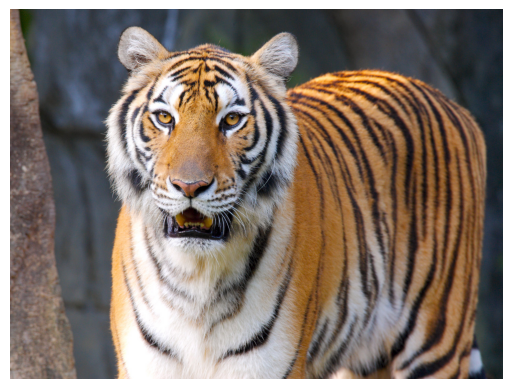

In [45]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

 
path = "C:/Fares Data/University/Samsung X LifeMakers Internship/Image Preprocessing Techniques/tiger.jpg"
img = cv2.imread(path)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')
plt.show()


### **Uniform Resizing and Color Channel Format Conversion**

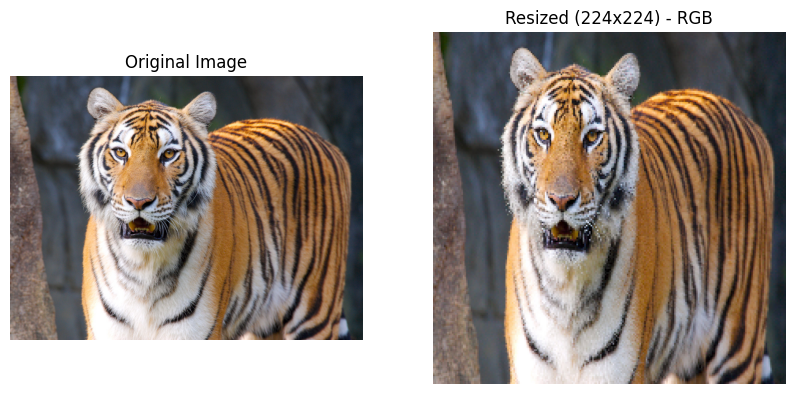

In [46]:
def resize_and_convert_show(img, width=224, height=224):
    resized = cv2.resize(img, (width, height))
    rgb_converted = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    axes[1].imshow(rgb_converted)
    axes[1].set_title(f"Resized ({width}x{height}) - RGB")
    axes[1].axis('off')

    plt.show()

    return rgb_converted

final_img = resize_and_convert_show(img)

### **Data Type and Normalization**

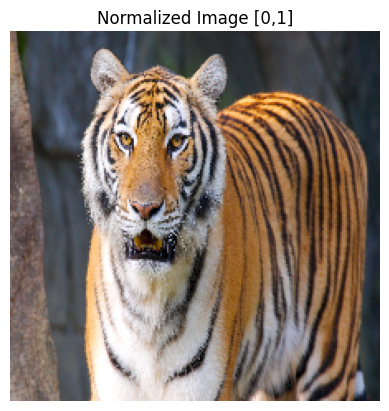

In [47]:
def normalize_image(img, mean=None, std=None):
    img_float = img.astype('float32')
    minmax_normalized = img_float / 255.0

    if mean is not None and std is not None:
        standardized = (minmax_normalized - mean) / std
        return standardized
    else:
        return minmax_normalized

normalized_img = normalize_image(final_img)

plt.imshow(normalized_img)
plt.title("Normalized Image [0,1]")
plt.axis('off')
plt.show()

# **Filtering and Noise Management**

### **Noise Addition**

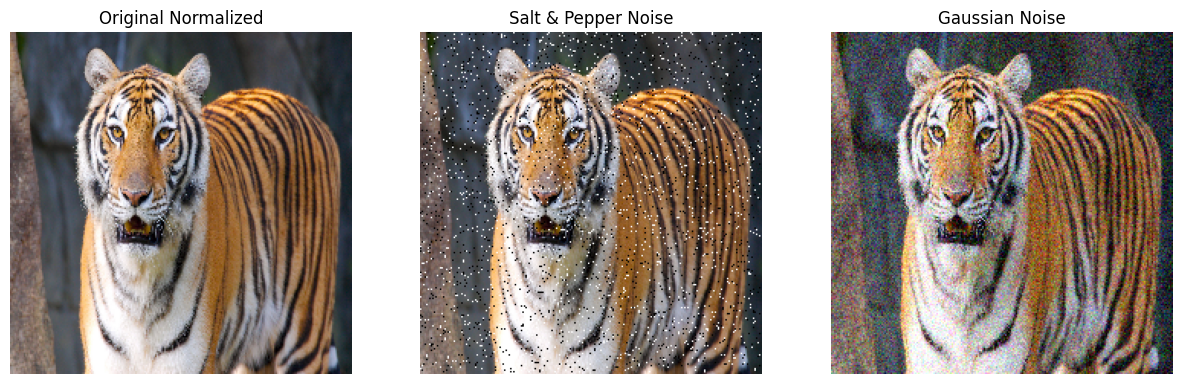

In [48]:
def add_salt_pepper_noise(img, amount=0.02):
    noisy = img.copy()
    num_salt = np.ceil(amount * img.size * 0.5)
    num_pepper = np.ceil(amount * img.size * 0.5)

    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in img.shape[:2]]
    noisy[coords[0], coords[1], :] = 1

    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in img.shape[:2]]
    noisy[coords[0], coords[1], :] = 0

    return noisy


def add_gaussian_noise(img, mean=0, std=0.1):
    gauss = np.random.normal(mean, std, img.shape)
    noisy = img + gauss
    noisy = np.clip(noisy, 0.0, 1.0)
    return noisy


sp_noisy = add_salt_pepper_noise(normalized_img)
gauss_noisy = add_gaussian_noise(normalized_img)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(normalized_img)
axes[0].set_title("Original Normalized")
axes[0].axis('off')

axes[1].imshow(sp_noisy)
axes[1].set_title("Salt & Pepper Noise")
axes[1].axis('off')

axes[2].imshow(gauss_noisy)
axes[2].set_title("Gaussian Noise")
axes[2].axis('off')

plt.show()


### **Noise Removal (Denoising)**

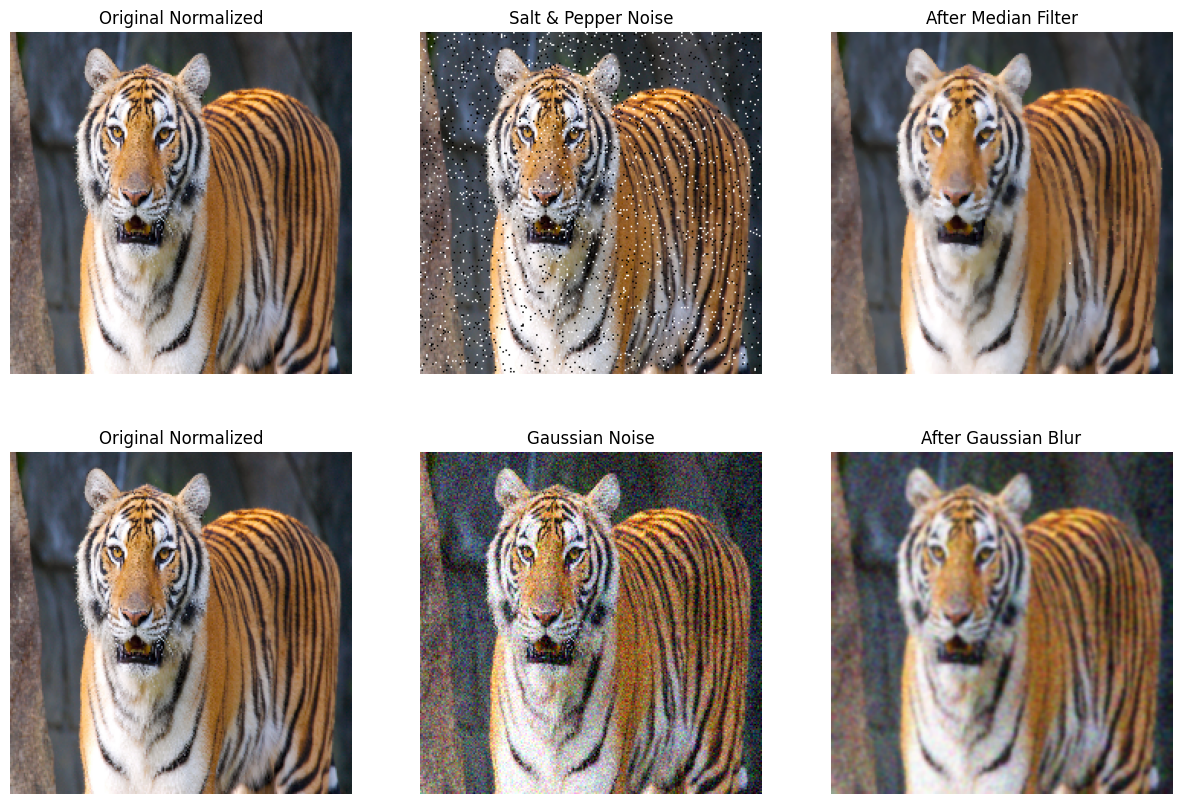

In [49]:
def remove_salt_pepper_noise(img, ksize=3):
    denoised = cv2.medianBlur((img * 255).astype('uint8'), ksize)
    denoised = denoised.astype('float32') / 255.0
    return denoised

def remove_gaussian_noise(img, ksize=5, sigma=0.5):
    denoised = cv2.GaussianBlur(img, (ksize, ksize), sigma)
    return denoised

sp_denoised = remove_salt_pepper_noise(sp_noisy, ksize=3)
gauss_denoised = remove_gaussian_noise(gauss_noisy, ksize=5, sigma=1.0)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0,0].imshow(normalized_img)
axes[0,0].set_title("Original Normalized")
axes[0,0].axis('off')

axes[0,1].imshow(sp_noisy)
axes[0,1].set_title("Salt & Pepper Noise")
axes[0,1].axis('off')

axes[0,2].imshow(sp_denoised)
axes[0,2].set_title("After Median Filter")
axes[0,2].axis('off')

axes[1,0].imshow(normalized_img)
axes[1,0].set_title("Original Normalized")
axes[1,0].axis('off')

axes[1,1].imshow(gauss_noisy)
axes[1,1].set_title("Gaussian Noise")
axes[1,1].axis('off')

axes[1,2].imshow(gauss_denoised)
axes[1,2].set_title("After Gaussian Blur")
axes[1,2].axis('off')

plt.show()


### **Quantitative Evaluation**

In [50]:
def calculate_mse(original, compared):
    return np.mean((original - compared) ** 2)

def calculate_psnr(original, compared):
    mse = calculate_mse(original, compared)
    if mse == 0:
        return float('inf')
    psnr = 10 * np.log10(1.0 / mse)
    return psnr

# --- Salt & Pepper Noise Evaluation ---
mse_sp_noisy = calculate_mse(normalized_img, sp_noisy)
psnr_sp_noisy = calculate_psnr(normalized_img, sp_noisy)

mse_sp_denoised = calculate_mse(normalized_img, sp_denoised)
psnr_sp_denoised = calculate_psnr(normalized_img, sp_denoised)

# --- Gaussian Noise Evaluation ---
mse_gauss_noisy = calculate_mse(normalized_img, gauss_noisy)
psnr_gauss_noisy = calculate_psnr(normalized_img, gauss_noisy)

mse_gauss_denoised = calculate_mse(normalized_img, gauss_denoised)
psnr_gauss_denoised = calculate_psnr(normalized_img, gauss_denoised)

print("=== Salt & Pepper Noise ===")
print(f"MSE (Original vs Noisy):     {mse_sp_noisy:.6f}")
print(f"PSNR (Original vs Noisy):    {psnr_sp_noisy:.2f} dB")
print(f"MSE (Original vs Denoised):  {mse_sp_denoised:.6f}")
print(f"PSNR (Original vs Denoised): {psnr_sp_denoised:.2f} dB\n")

print("=== Gaussian Noise ===")
print(f"MSE (Original vs Noisy):     {mse_gauss_noisy:.6f}")
print(f"PSNR (Original vs Noisy):    {psnr_gauss_noisy:.2f} dB")
print(f"MSE (Original vs Denoised):  {mse_gauss_denoised:.6f}")
print(f"PSNR (Original vs Denoised): {psnr_gauss_denoised:.2f} dB")

=== Salt & Pepper Noise ===
MSE (Original vs Noisy):     0.017952
PSNR (Original vs Noisy):    17.46 dB
MSE (Original vs Denoised):  0.002917
PSNR (Original vs Denoised): 25.35 dB

=== Gaussian Noise ===
MSE (Original vs Noisy):     0.009491
PSNR (Original vs Noisy):    20.23 dB
MSE (Original vs Denoised):  0.004305
PSNR (Original vs Denoised): 23.66 dB


# **Color Transformation and Data Augmentation**

### **Color Space Transformation**

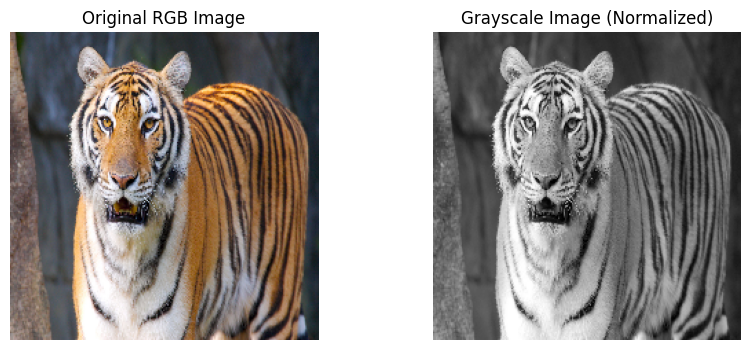

In [51]:
def rgb_to_grayscale(img_rgb):
    gray = cv2.cvtColor((img_rgb * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
    gray_norm = gray.astype(np.float32) / 255.0  # normalize back to [0,1]
    
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(img_rgb)
    plt.title("Original RGB Image")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(gray_norm, cmap='gray')
    plt.title("Grayscale Image (Normalized)")
    plt.axis('off')
    plt.show()

    return gray_norm
    
gray_img = rgb_to_grayscale(normalized_img)


### **Hue and Saturation Adjustment**

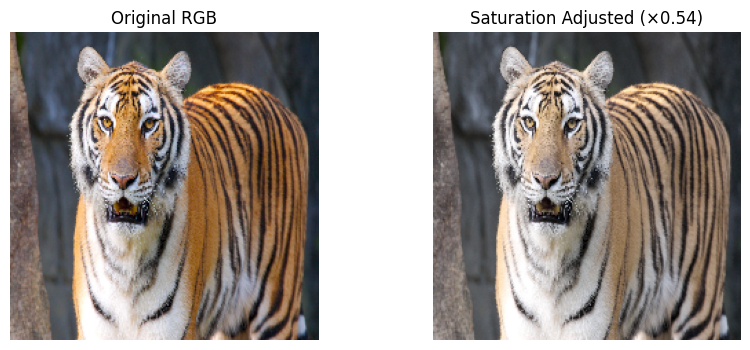

In [ ]:
def adjust_saturation(img_rgb):
    img_uint8 = (img_rgb * 255).astype(np.uint8)
    
    hsv = cv2.cvtColor(img_uint8, cv2.COLOR_RGB2HSV)
    
    factor = random.uniform(0.5, 1.5)
    
    hsv = hsv.astype(np.float32)
    hsv[:, :, 1] *= factor
    hsv[:, :, 1] = np.clip(hsv[:, :, 1], 0, 255)
    
    adjusted_rgb = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB)
    
    adjusted_rgb = adjusted_rgb.astype(np.float32) / 255.0

    
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original RGB")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(adjusted_rgb)
    plt.title(f"Saturation Adjusted (×{factor:.2f})")
    plt.axis('off')
    plt.show()

    return adjusted_rgb, factor

adjusted_img, factor = adjust_saturation(normalized_img)


### **Geometric Augmentation Pipeline**

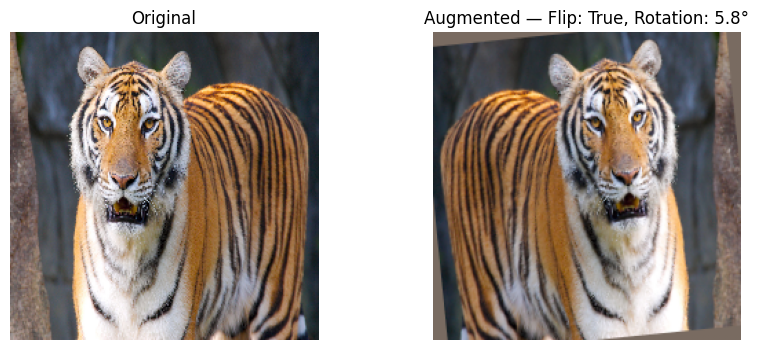

In [72]:
def geometric_augment(img_rgb, max_angle=10.0):
    if img_rgb is None:
        raise ValueError("img_rgb is None")
    if img_rgb.dtype != np.float32 and img_rgb.dtype != np.float64:
        raise ValueError("img_rgb must be float in [0,1]")
    img = img_rgb.copy()
    h, w = img.shape[:2]

    img_u8 = (np.clip(img, 0, 1) * 255).astype(np.uint8)

    flip_applied = False
    if random.random() < 0.5:
        img_u8 = cv2.flip(img_u8, 1)
        flip_applied = True

    rotation_applied = False
    angle = 0.0
    if random.random() < 0.5:
        angle = random.uniform(-max_angle, max_angle)
        center = (w // 2, h // 2)
        rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)

        mean_color = tuple([int(c) for c in img_u8.reshape(-1, 3).mean(axis=0)])
        img_u8 = cv2.warpAffine(
            img_u8,
            rot_mat,
            (w, h),
            flags=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_CONSTANT,
            borderValue=mean_color
        )
        rotation_applied = True

    augmented = img_u8.astype(np.float32) / 255.0

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(np.clip(img_rgb,0,1))
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(np.clip(augmented,0,1))
    plt.title(f"Augmented — Flip: {flip_applied}, Rotation: {angle:.1f}°")
    plt.axis("off")
    plt.show()

    return augmented


aug = geometric_augment(normalized_img)